# <center>Water Potability Prediction 💧</center>

<center><img src="https://images.unsplash.com/photo-1437914983566-976d85602771?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=870&q=80"></center>

# About the Dataset

**1. pH value:**
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards. ---> ***Input Variable***

**2. Hardness:**
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium. ---> ***Input Variable***

**3. Solids (Total dissolved solids - TDS):**
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose. ---> ***Input Variable***

**4. Chloramines:**
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water. ---> ***Input Variable***

**5. Sulfate:**
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations. ---> ***Input Variable***

**6. Conductivity:**
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm. ---> ***Input Variable***

**7. Organic_carbon:**
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment. ---> ***Input Variable***

**8. Trihalomethanes:**
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water. ---> ***Input Variable***

**9. Turbidity:**
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU. ---> ***Input Variable***

**10. Potability:**
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable. ---> ***Output Variable***

# Importing Essential Libraries, Metrics, Tools and Models

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

# Loading the Data

In [2]:
df = pd.read_csv("../input/water-potability/water_potability.csv")

# Exploratory Data Analysis

***Taking a look at the first 5 rows of the dataset.***

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


***Checking the shape—i.e. size—of the data.***

In [4]:
df.shape

(3276, 10)

***Learning the dtypes of columns' and how many non-null values there are in those columns.***

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


***Getting the statistical summary of dataset.***

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


# Handling Missing Values and Duplicates

***As we can see, there are missing values in columns "ph", "Sulfate" and "Trihalomethanes".***

In [7]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

***Visualizing the Nullity Matrix(missing values).***

<AxesSubplot:>

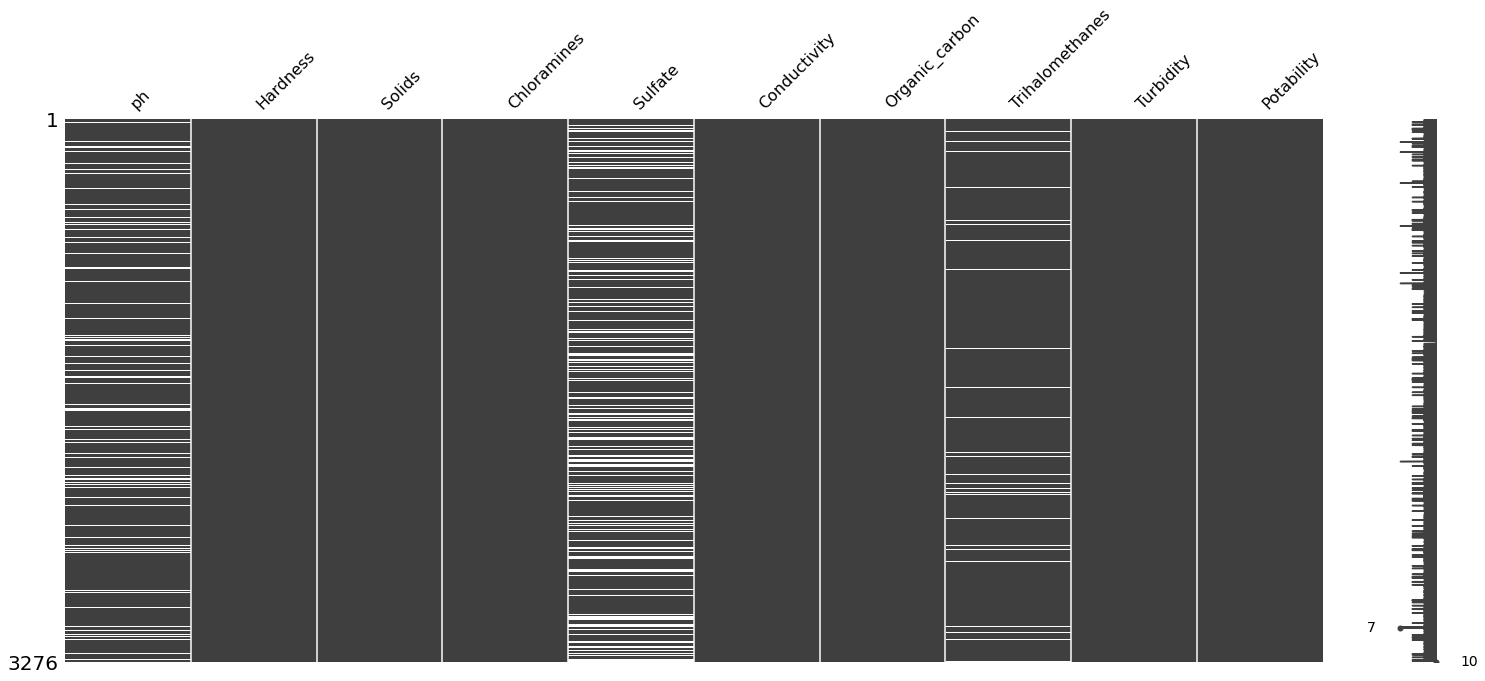

In [8]:
msno.matrix(df)

***Imputing the missing values with the mean value of that particular column by "Potability". It means that if there is missing value in a row and that row has the "Potability" value of 1, it is imputed with mean value of the group in that particular column in which all the rows have the "Potability" value of 1. If that row has the "Potability" value of 0, then it is imputed with mean value of the group in that particular column in which all the rows have the "Potability" value of 0.***

In [9]:
df['ph'] = df['ph'].fillna(df.groupby(['Potability'])['ph'].transform('mean'))
df['Sulfate'] = df['Sulfate'].fillna(df.groupby(['Potability'])['Sulfate'].transform('mean'))
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df.groupby(['Potability'])['Trihalomethanes'].transform('mean'))

***It seems that there is no duplicate in the dataset.***

In [10]:
df.duplicated().sum()

0

# Data Visualization

***Visualizing the Correlation between the ten numerical real-valued variables using pairplot visualization.***

* Blue ---> **Non Potable**
* Orange ---> **Potable**

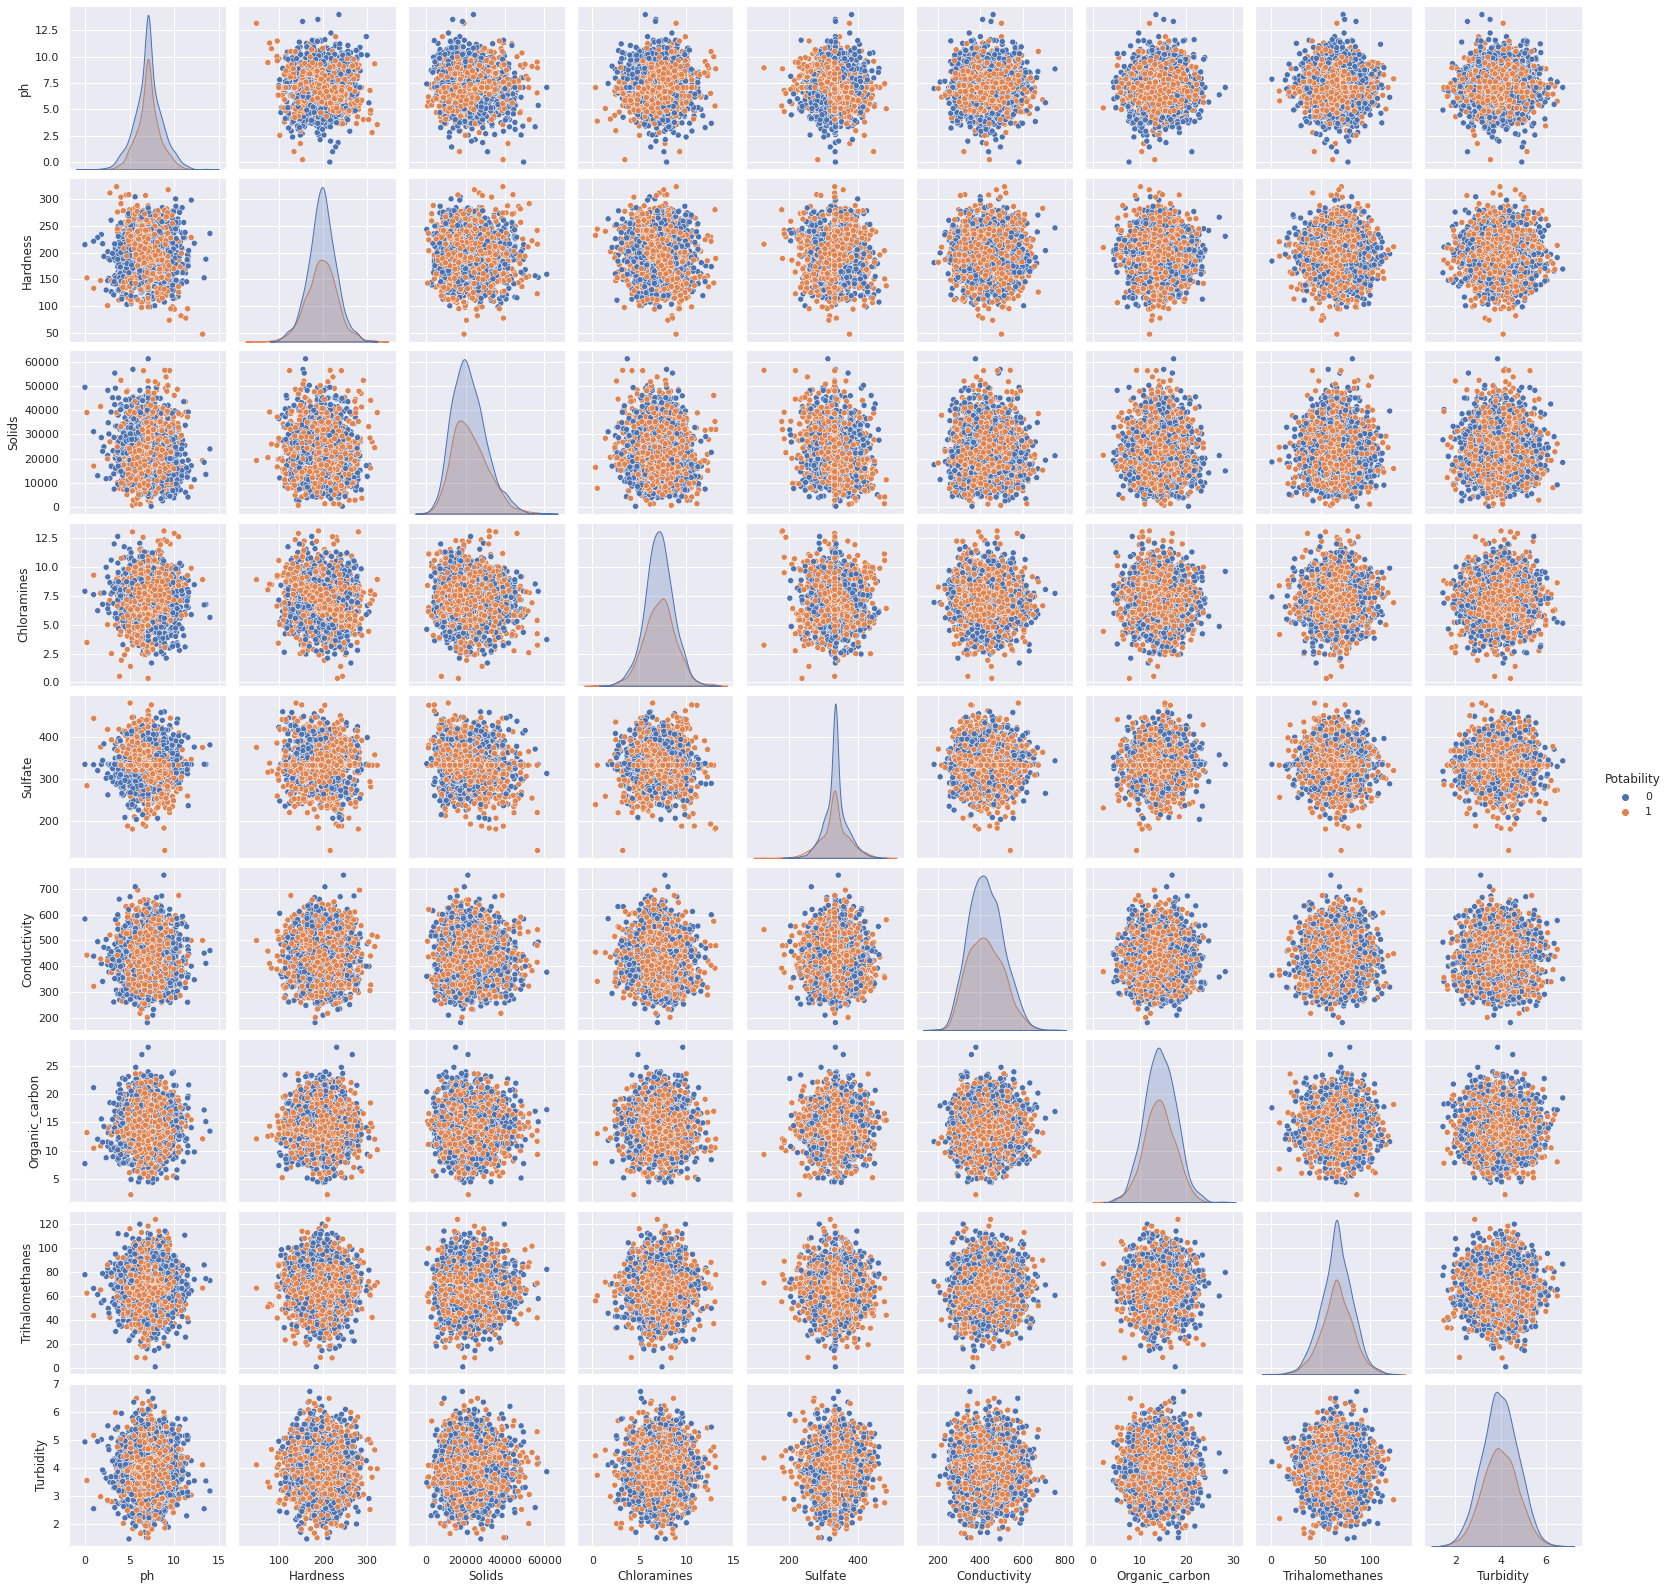

In [11]:
sns.set()

sns.pairplot(df, hue="Potability")

<h3>Plotting the Distribution of Each Variable</h3>

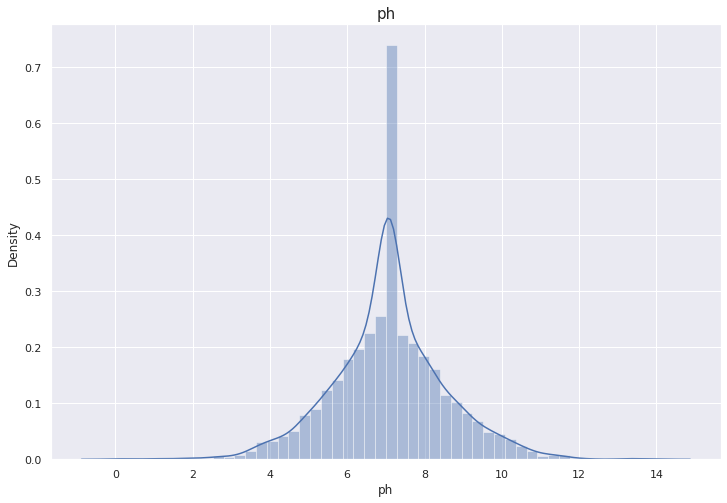

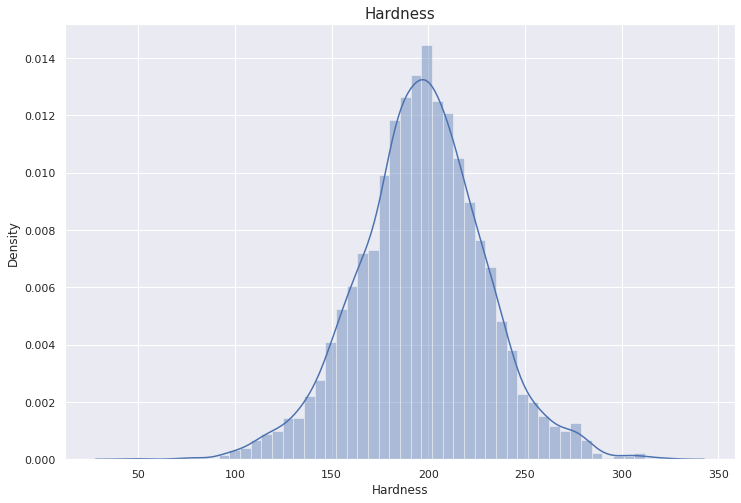

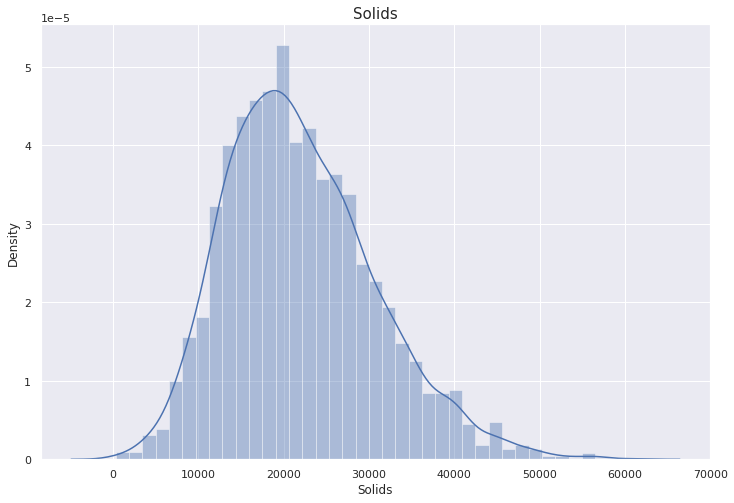

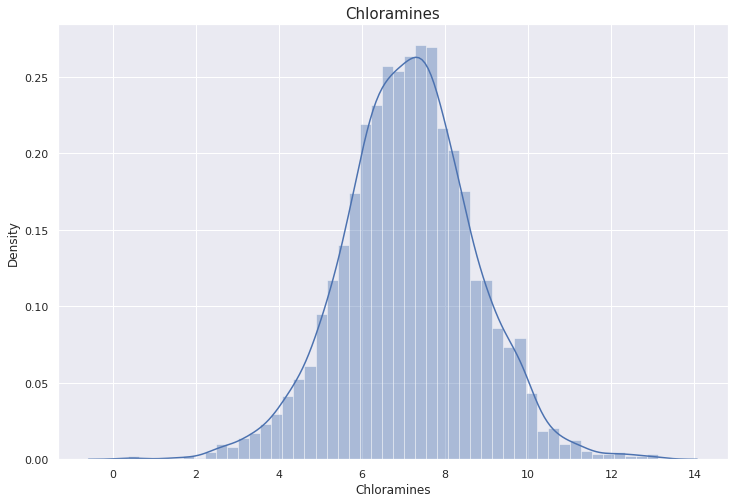

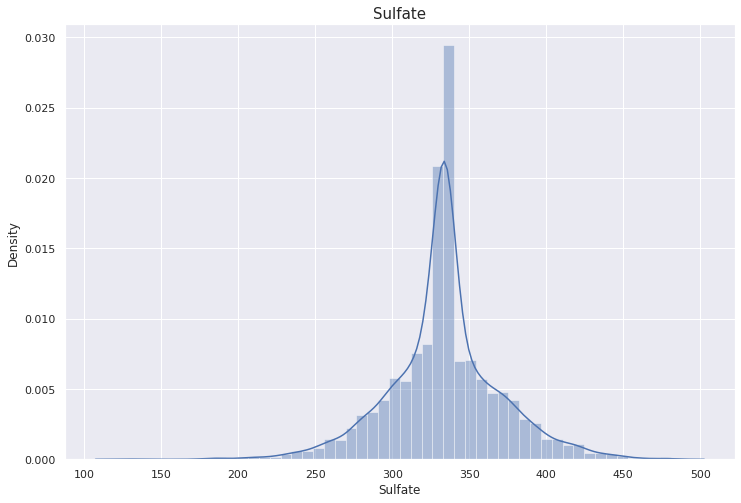

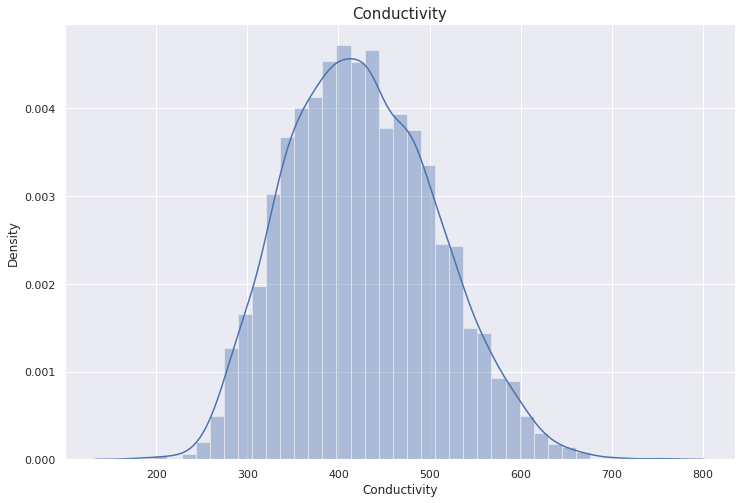

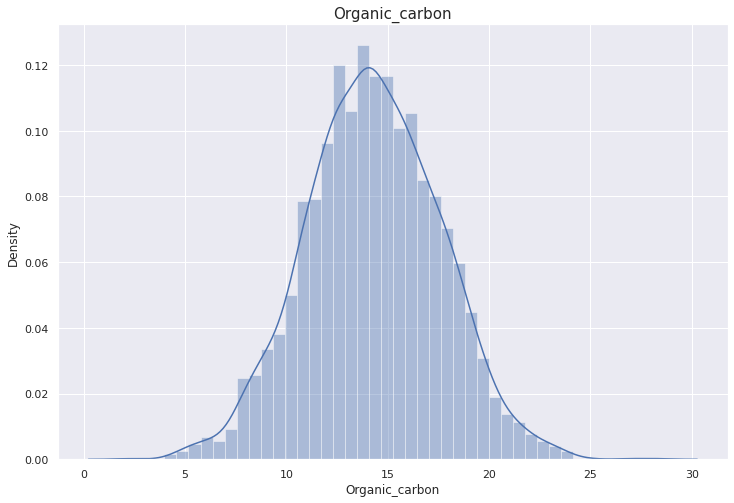

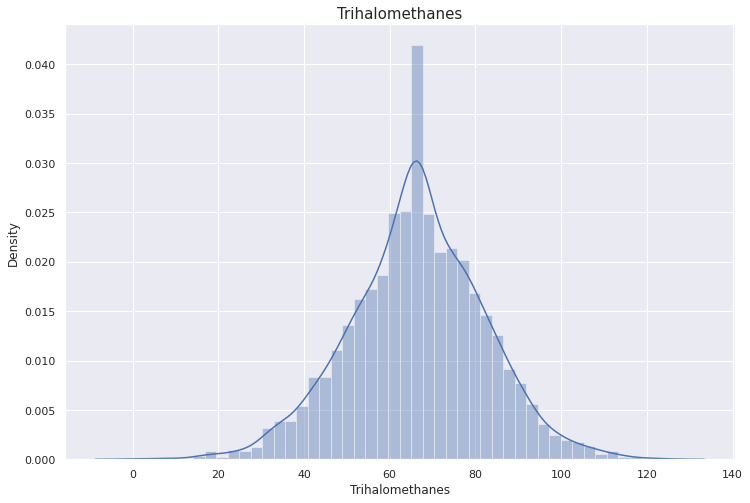

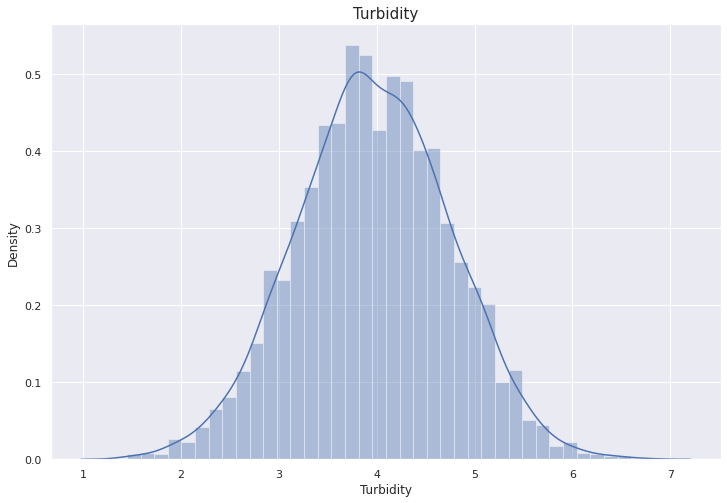

In [12]:
for col in df.drop("Potability", axis=1).columns:
    plt.figure(figsize=(12,8))
    sns.distplot(df[col])
    plt.title(f"{col}", size=15)
    plt.show()

In [13]:
labels = ['Not Potable','Potable']
values = [df[df["Potability"]==0].shape[0], df[df["Potability"]==1].shape[0]]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.5, title="Potability")])
fig.show()

<h3>Relationship Between Each Variable and Target Variable (Potability)</h3>

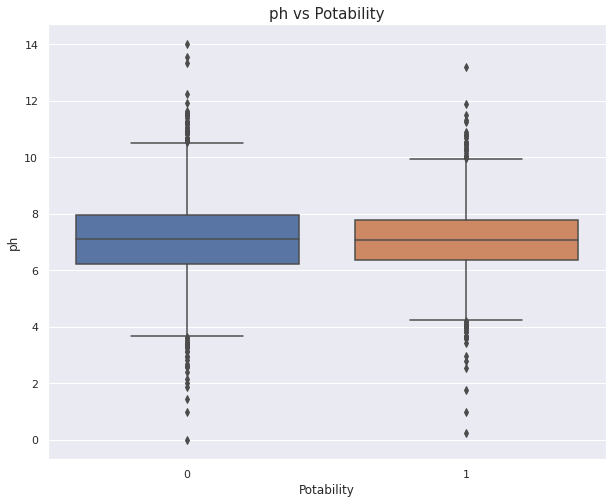

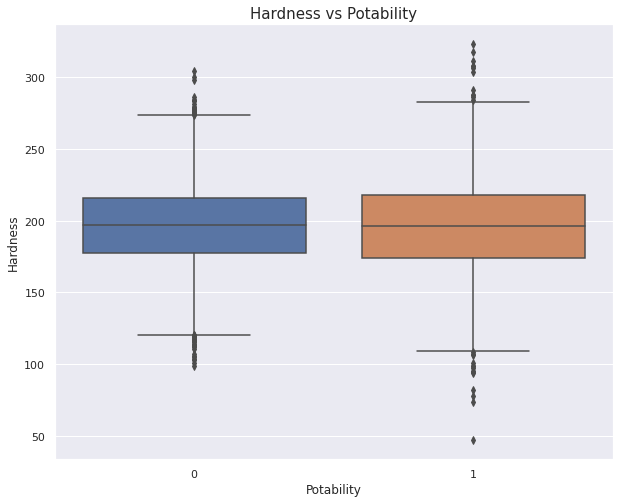

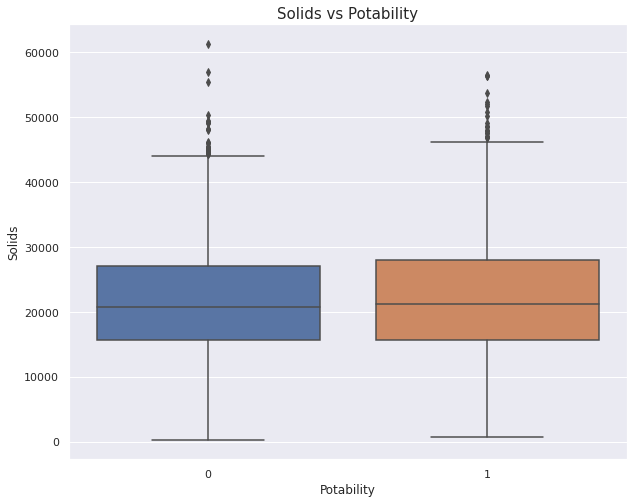

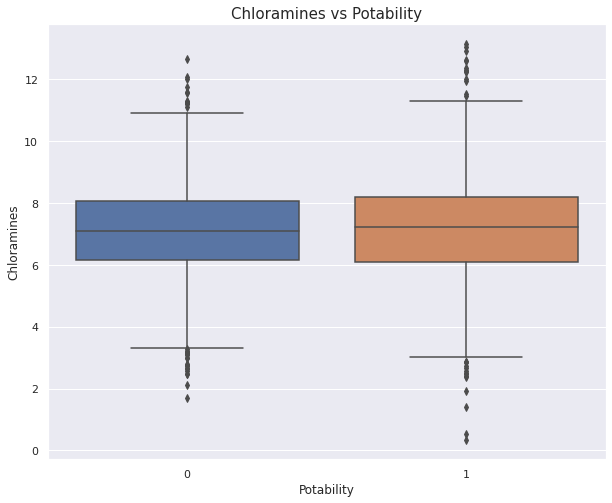

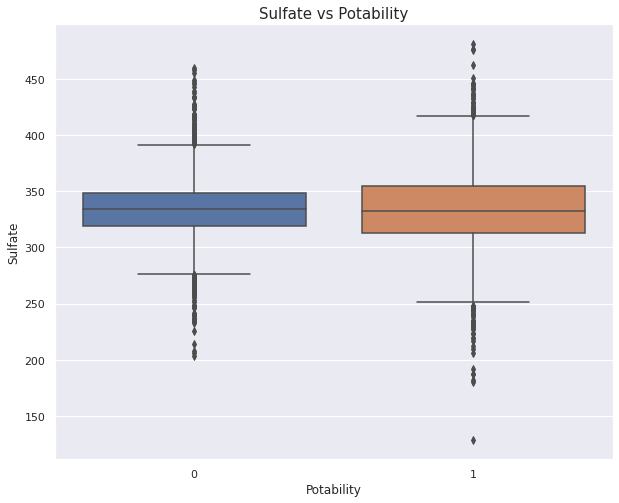

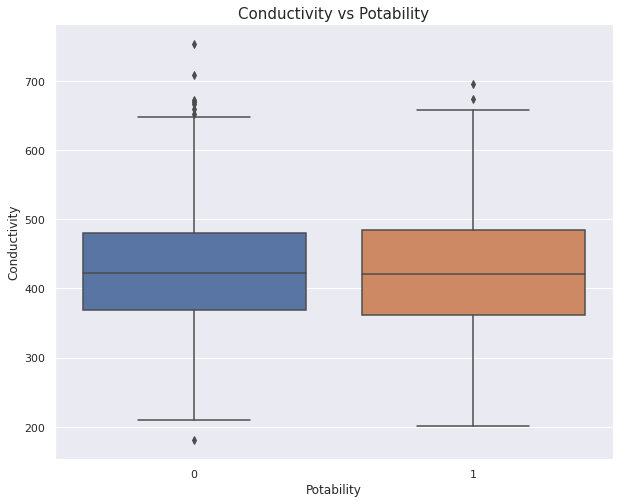

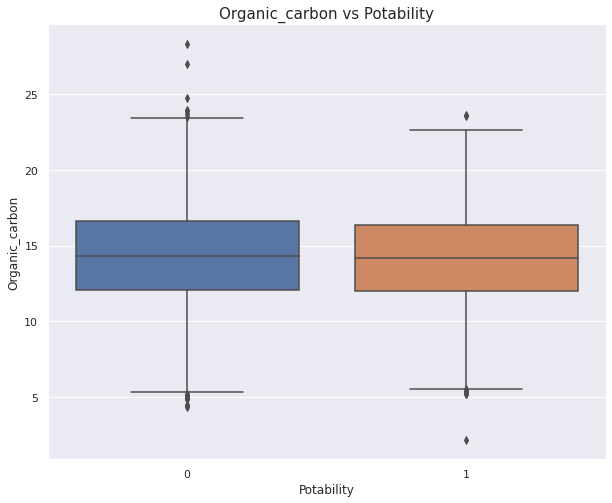

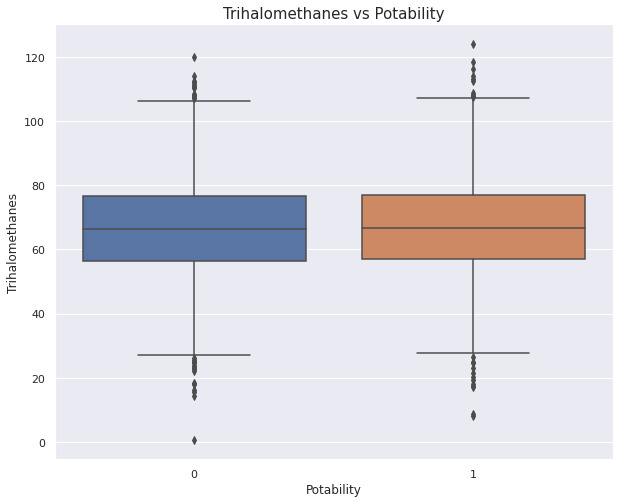

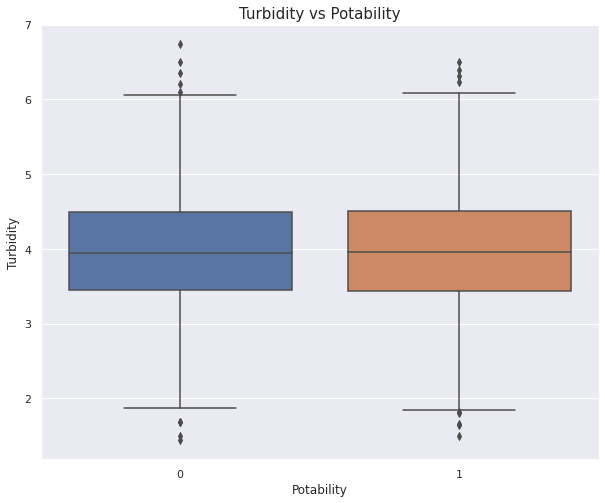

In [14]:
for col in df.drop("Potability", axis=1).columns:
    plt.figure(figsize=(10,8))
    sns.boxplot(df["Potability"], df[col])
    plt.title(f"{col} vs Potability", size=15)
    plt.show()

***Visualizing the linear correlations between variables using Heatmap Visualization. The measure used for finding the linear correlation between each variable is Pearson Correlation Coefficient.***

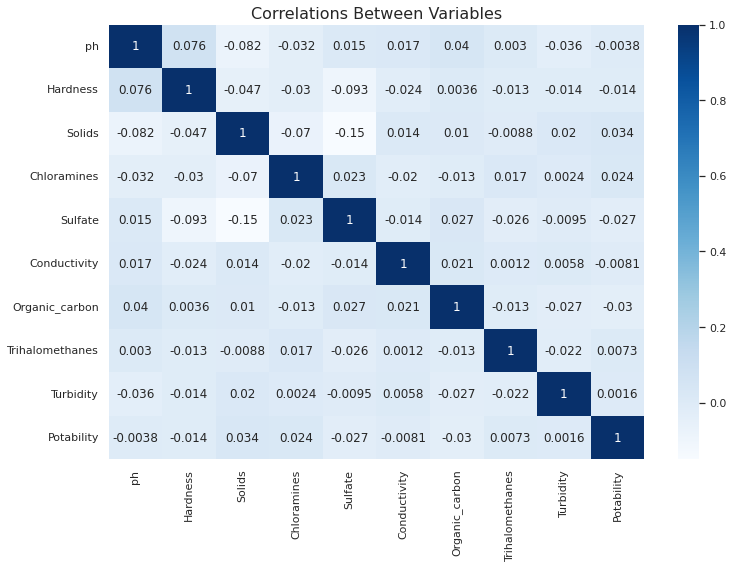

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.title("Correlations Between Variables", size=16)
plt.show()

# Data Preprocessing

<h3>X, y Split</h3>

In [16]:
X = df.drop("Potability", axis=1)
y = df["Potability"]

<h3>Data Standardization</h3>

In [17]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

<h3>Train-Test Split</h3>

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Machine Learning Models

In [19]:
models = pd.DataFrame(columns=["Model", "Accuracy Score"])

In [20]:
model_list = [("Logistic Regression", LogisticRegression(random_state=42)), 
              ("Random Forest", RandomForestClassifier(random_state=42)),
              ("LightGBM", LGBMClassifier(random_state=42)),
              ("Support Vector Machines", SVC(random_state=42)),
              ("XGBoost", XGBClassifier(random_state=42)),
              ("Gaussian Naive Bayes", GaussianNB()),
              ("Bernoulli Naive Bayes", BernoulliNB()),
              ("KNN", KNeighborsClassifier(n_neighbors=2)),
              ("Decision Tree", DecisionTreeClassifier(random_state=42)),
              ("Bagging Classifier", BaggingClassifier(base_estimator=RandomForestClassifier(), random_state=42))]

In [21]:
for name, clf in model_list:
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    score = accuracy_score(y_test, predictions)
    
    new_row = {"Model": name, "Accuracy Score": score}
    models = models.append(new_row, ignore_index=True)

[16:57:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


***It can be seen that the one which is yielding the most accurate result without Hyperparameter Tuning is Random Forest.***

In [22]:
models.sort_values(by="Accuracy Score", ascending=False)

,Model,Accuracy Score
1,Random Forest,0.824695
2,LightGBM,0.807927
9,Bagging Classifier,0.806402
4,XGBoost,0.801829
8,Decision Tree,0.746951
3,Support Vector Machines,0.699695
7,KNN,0.663110
6,Bernoulli Naive Bayes,0.632622
5,Gaussian Naive Bayes,0.631098
0,Logistic Regression,0.628049


***Defining a ROC AUC Curve visualization function for the convenience of evaluation.***

In [23]:
def visualize_roc_auc_curve(model, model_name):
    pred_prob = model.predict_proba(X_test)
    fpr, tpr, thresh = roc_curve(y_test, pred_prob[:, 1], pos_label=1)
    
    score = roc_auc_score(y_test, pred_prob[:, 1])
    
    plt.figure(figsize=(10,8))
    plt.plot(fpr, tpr, linestyle="--", color="orange", label="ROC AUC Score: (%0.5f)" % score)
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    
    plt.title(f"{model_name} ROC Curve", size=15)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right", prop={"size": 15})
    plt.show()

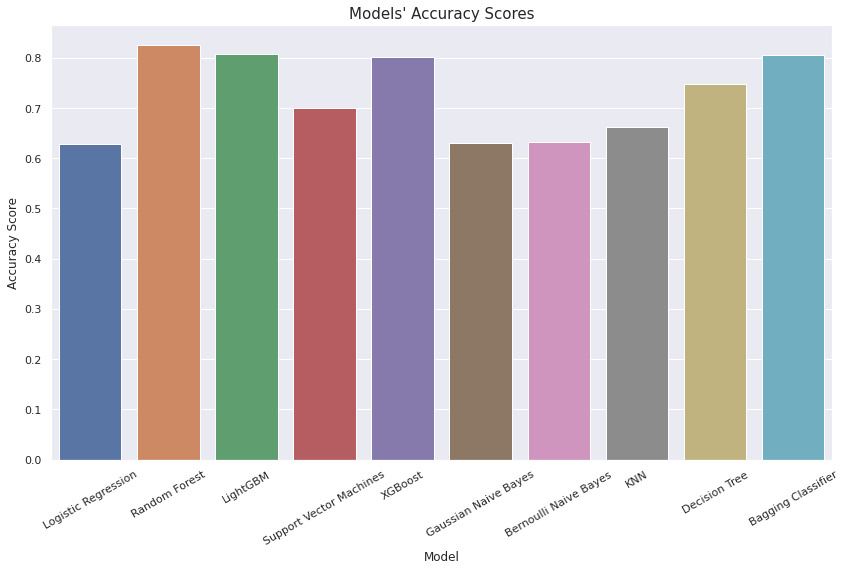

In [24]:
plt.figure(figsize=(14, 8))
sns.barplot(x=models["Model"], y=models["Accuracy Score"])
plt.title("Models' Accuracy Scores", size=15)
plt.xticks(rotation=30)
plt.show()

<h3>Confusion Matrix and ROC Curve of Random Forest</h3>

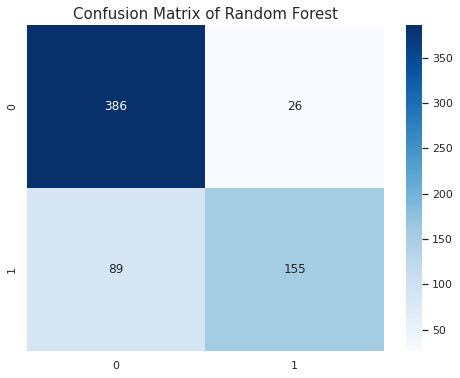

In [25]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix of Random Forest", size=15)
plt.show()

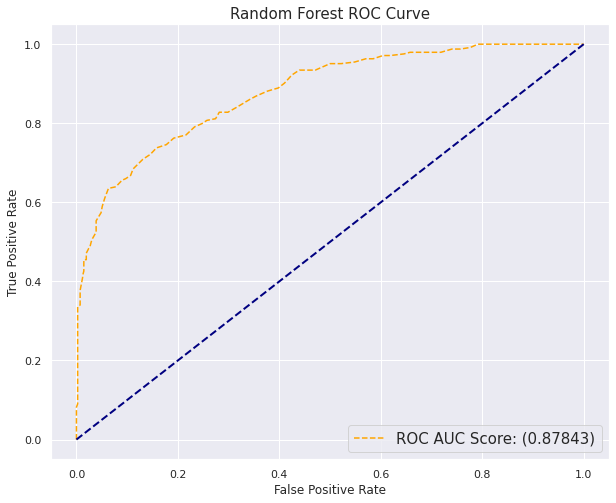

In [26]:
visualize_roc_auc_curve(rfc, "Random Forest")

<h3>Confusion Matrix and ROC Curve of LightGBM</h3>

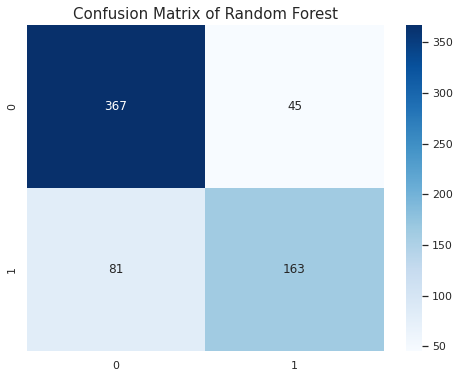

In [27]:
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)
predictions = lgbm.predict(X_test)

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix of Random Forest", size=15)
plt.show()

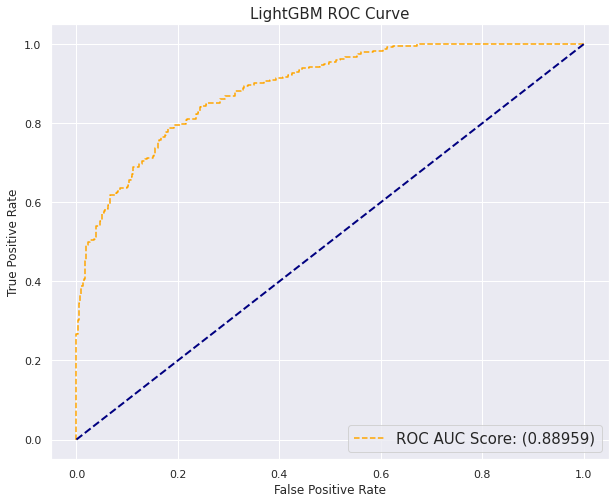

In [28]:
visualize_roc_auc_curve(lgbm, "LightGBM")

<h3>Confusion Matrix and ROC Curve of Bagging Classifier</h3>

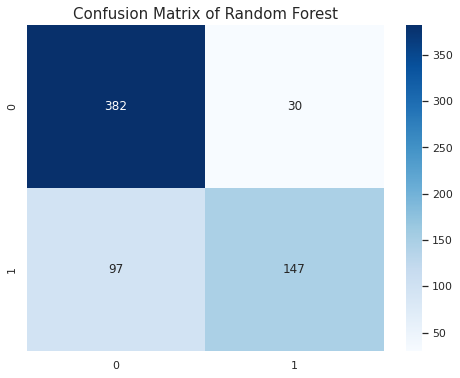

In [29]:
bag = BaggingClassifier(base_estimator=RandomForestClassifier(), random_state=42)
bag.fit(X_train, y_train)
predictions = bag.predict(X_test)

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix of Random Forest", size=15)
plt.show()

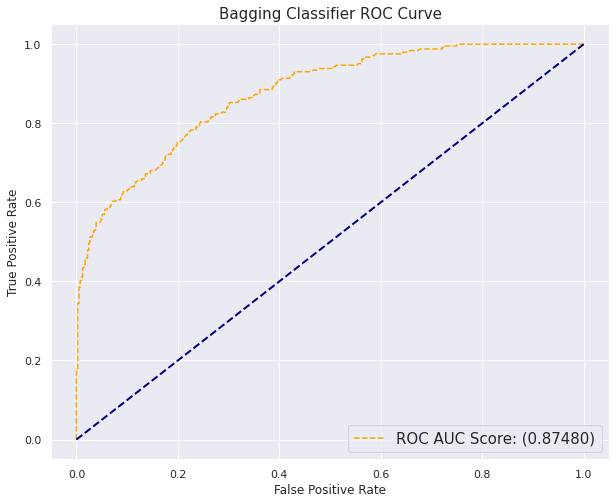

In [30]:
visualize_roc_auc_curve(bag, "Bagging Classifier")

# Hyperparameter Tuning

In [31]:
tuned_models = pd.DataFrame(columns=["Model", "Accuracy Score"])

<h3>Tuning the LightGBM</h3>

In [32]:
param_grid_lgbm = param_grid = {'learning_rate': [0.01, 0.05, 0.1],
                                'n_estimators': [10, 50, 100, 150, 200],
                                'num_leaves': [6, 10, 16, 20, 31, 40],
                                'objective' : ['binary'],
                                "random_state": [42]}

grid_lgbm = GridSearchCV(LGBMClassifier(), param_grid_lgbm, scoring="accuracy", cv=5, verbose=0, n_jobs=-1)

grid_lgbm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [10, 50, 100, 150, 200],
                         'num_leaves': [6, 10, 16, 20, 31, 40],
                         'objective': ['binary'], 'random_state': [42]},
             scoring='accuracy')

In [33]:
lgbm_params = grid_lgbm.best_params_
lgbm = LGBMClassifier(**lgbm_params)
lgbm.fit(X_train, y_train)
predictions = lgbm.predict(X_test)
score = accuracy_score(y_test, predictions)
print("Accuracy Score:", score)

new_row = {"Model": "LightGBM", "Accuracy Score": score}
tuned_models = tuned_models.append(new_row, ignore_index=True)

Accuracy Score: 0.7957317073170732


<h3>Tuning the Random Forest</h3>

In [34]:
param_grid_rfc = {"min_samples_split": [2, 3, 10],
                  "min_samples_leaf": [1, 3, 10],
                  "n_estimators" :[100, 200, 500],
                  "random_state": [42]}

grid_rfc = GridSearchCV(RandomForestClassifier(), param_grid_rfc, scoring="accuracy", cv=5, verbose=0, n_jobs=-1)

grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10],
                         'n_estimators': [100, 200, 500],
                         'random_state': [42]},
             scoring='accuracy')

In [35]:
rfc_params = grid_rfc.best_params_
rfc = RandomForestClassifier(**rfc_params)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
score = accuracy_score(y_test, predictions)
print("Accuracy Score:", score)

new_row = {"Model": "Random Forest", "Accuracy Score": score}
tuned_models = tuned_models.append(new_row, ignore_index=True)

Accuracy Score: 0.7926829268292683


<h3>Tuning the Decision Tree</h3>

In [36]:
param_grid_dt = {'criterion':['gini','entropy'],
                  'max_depth': np.arange(3, 50)}

grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, scoring="accuracy", cv=5, verbose=0, n_jobs=-1)

grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             scoring='accuracy')

In [37]:
dt_params = grid_dt.best_params_
dt = DecisionTreeClassifier(**dt_params)
dt.fit(X_train, y_train)
predictions = dt.predict(X_test)
score = accuracy_score(y_test, predictions)
print("Accuracy Score:", score)

new_row = {"Model": "Decision Tree Classifier", "Accuracy Score": score}
tuned_models = tuned_models.append(new_row, ignore_index=True)

Accuracy Score: 0.7667682926829268


# Model Comparison After Hyperparameter Tuning

***After all the Hyperparameter Tuning endeavour, there is a little bit improvement (0.18293) in the Decision Tree's result and decrease in LigthGBM's and Random Forest's accuracy scores.***

In [38]:
tuned_models.sort_values(by="Accuracy Score", ascending=False)

,Model,Accuracy Score
0,LightGBM,0.795732
1,Random Forest,0.792683
2,Decision Tree Classifier,0.766768


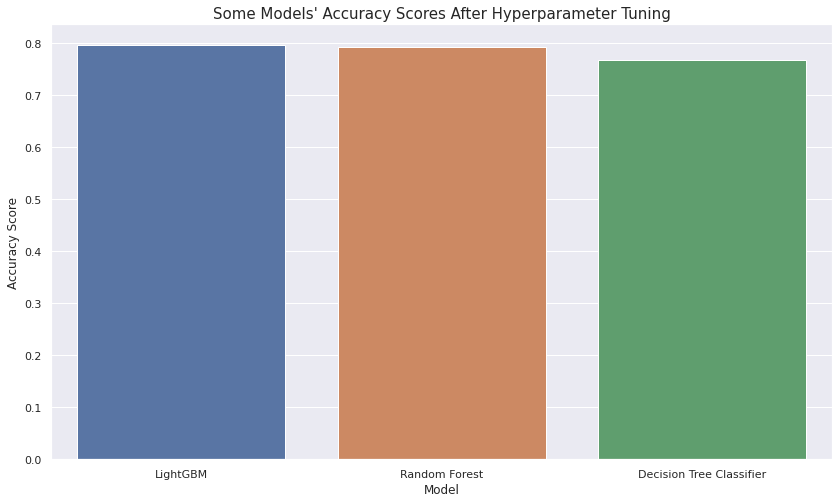

In [39]:
plt.figure(figsize=(14, 8))
sns.barplot(x=tuned_models["Model"], y=tuned_models["Accuracy Score"])
plt.title("Some Models' Accuracy Scores After Hyperparameter Tuning", size=15)
plt.show()

# Conclusion

**It can be observed that the model which yields the most accurate result is non-tuned Random Forest Classifier with an accuracy score of 0.824695. LightGBM and Bagging Classifier are other worthy-of-mention models.**

<h2 style="font-family: Times New Roman;">Thank you so much for reading the notebook. Preparing notebooks is taking a great deal of time. If you liked it, please do not forget to give an upvote. Peace Out ✌️ ...</h2>